#### Trial code for plotting sample cross section data from iaea.org

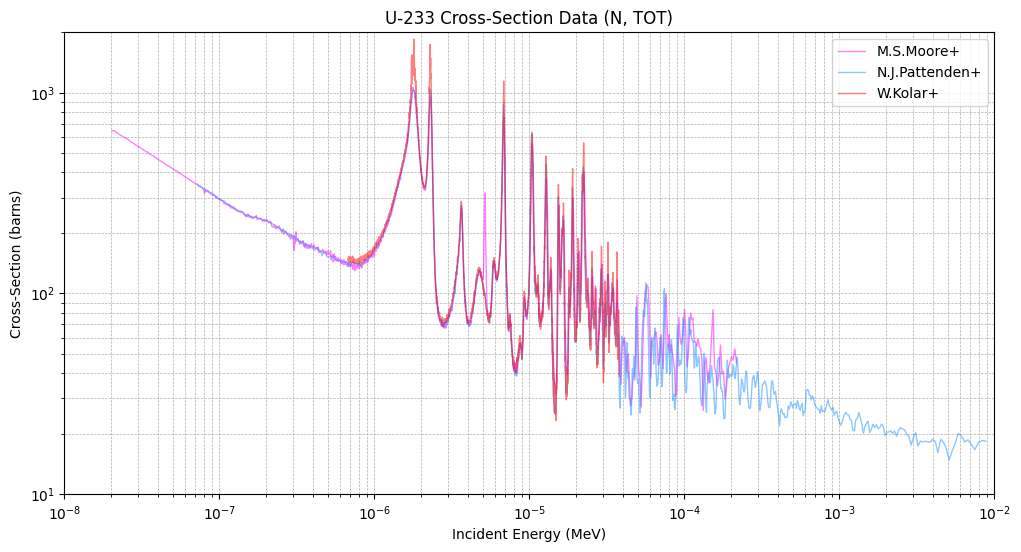

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define the path to the CSV file
file_path = 'data/X4sShowX4StdOut.csv'

# Load the CSV file
df = pd.read_csv(file_path)

# Filter out necessary columns
df_filtered = df[['author1', 'x2(eV)', 'y']].copy()
df_filtered.columns = ['Author', 'Energy', 'Cross_Section']

# Ensure that any rows with NaN values in the 'Energy' or 'Cross_Section' columns are removed
df_filtered = df_filtered.dropna(subset=['Energy', 'Cross_Section'])

# Convert Energy from eV to MeV
df_filtered['Energy'] = df_filtered['Energy'] * 1e-6

# Plotting - define the figure size
plt.figure(figsize=(12, 6))

# Define colors for each author
colors = ['fuchsia', 'dodgerblue','red']

# Plot data for each author
for (author, data), color in zip(df_filtered.groupby('Author'), colors):
    plt.plot(data['Energy'], data['Cross_Section'], linestyle='-', linewidth=1, label=author, color=color, alpha=0.5)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Incident Energy (MeV)')
plt.ylabel('Cross-Section (barns)')
plt.title('U-233 Cross-Section Data (N, TOT)')
plt.xlim(1e-8, 1e-2)  # Adjust x-axis range from 10^-8 MeV to 10^-2 MeV
plt.ylim(10, 2e3)     # Adjust y-axis range from 10^1 to 2*10^3
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


#### Class definition for cross section data plotting

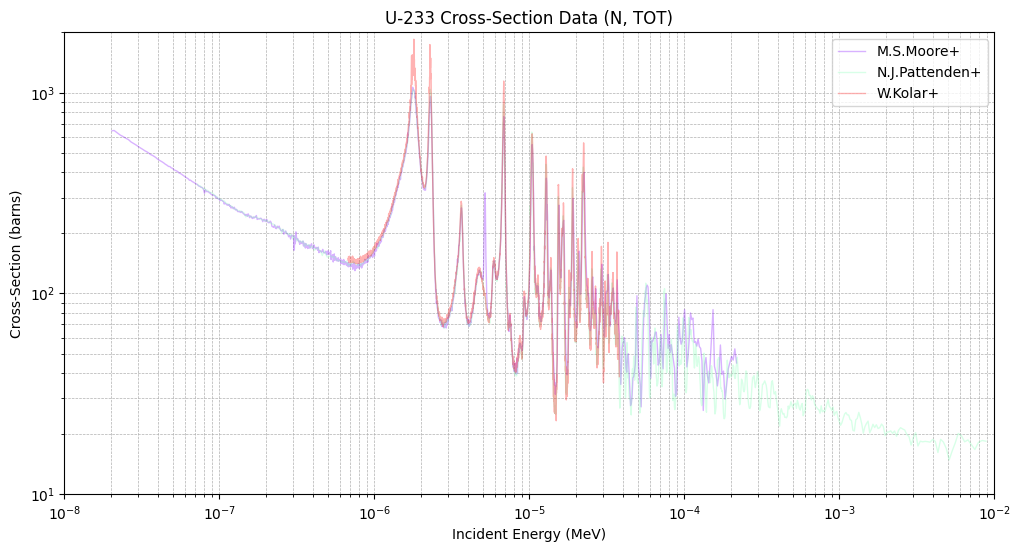

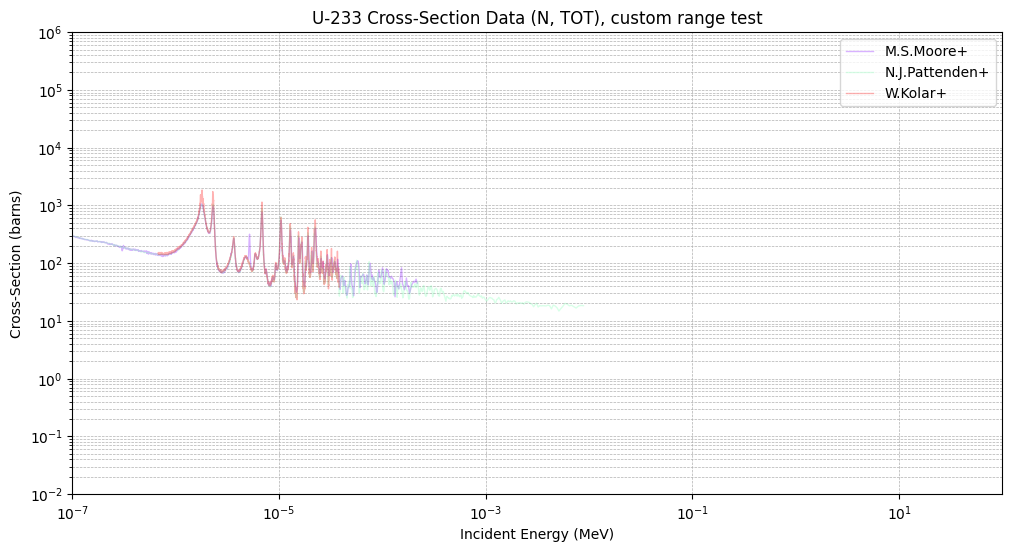

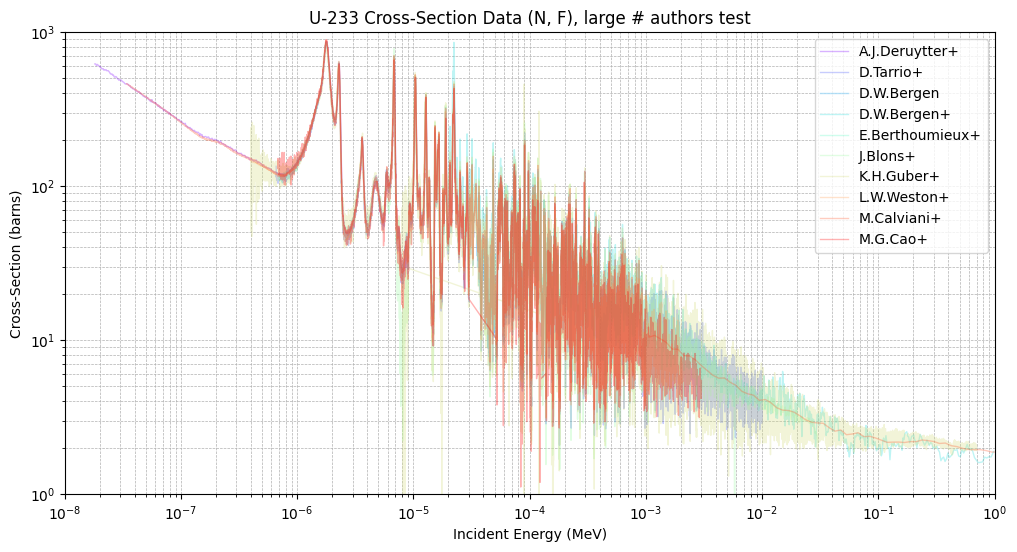

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

class CrossSectionPlotter:
    def __init__(self, file_path):
        self.file_path = file_path
        self.df = None
        self.df_filtered = None
    
    def load_data(self):
        # Load the CSV file
        self.df = pd.read_csv(self.file_path)
    
    def process_data(self):
        # Filter out necessary columns
        self.df_filtered = self.df[['author1', 'x2(eV)', 'y']].copy()
        self.df_filtered.columns = ['Author', 'Energy', 'Cross_Section']
        
        # Ensure that any rows with NaN values in the 'Energy' or 'Cross_Section' columns are removed
        self.df_filtered = self.df_filtered.dropna(subset=['Energy', 'Cross_Section'])
        
        # Convert Energy from eV to MeV
        self.df_filtered['Energy'] = self.df_filtered['Energy'] * 1e-6
    
    def plot_data(self, xlim, ylim, title='U-233 Cross-Section Data (N, TOT)'):
        # Plotting - define the figure size
        plt.figure(figsize=(12, 6))
        
        # Get unique authors
        authors = self.df_filtered['Author'].unique()
        
        # Generate a color map with a distinct color for each author
        colors = cm.rainbow(np.linspace(0, 1, len(authors)))
        
        # Plot data for each author
        for (author, data), color in zip(self.df_filtered.groupby('Author'), colors):
            plt.plot(data['Energy'], data['Cross_Section'], linestyle='-', linewidth=1, label=author, color=color, alpha=0.3)
        
        plt.xscale('log')
        plt.yscale('log')
        plt.xlabel('Incident Energy (MeV)')
        plt.ylabel('Cross-Section (barns)')
        plt.title(title)
        plt.xlim(xlim)  # Set x-axis range
        plt.ylim(ylim)  # Set y-axis range
        plt.legend()
        plt.grid(True, which='both', linestyle='--', linewidth=0.5)
        plt.show()

    def run(self, xlim=(1e-8, 1e-2), ylim=(10, 2e3), title='Title'):
        self.load_data()
        self.process_data()
        self.plot_data(xlim, ylim, title)

# Example usage:
# Create an instance of the CrossSectionPlotter class
plotter = CrossSectionPlotter(file_path='data/X4sShowX4StdOut.csv')

# Example, using default xlim, ylim, and custom title
plotter.run(title='U-233 Cross-Section Data (N, TOT)')

# Example, using custom xlim, ylim
plotter.run(xlim=(1e-7, 100), ylim=(1e-2, 1e6), title='U-233 Cross-Section Data (N, TOT), custom range test')

# Example, using larger data file with 7 authors and custom title
bigplotter = CrossSectionPlotter(file_path='data/X4sShowX4StdOut 2.csv')
bigplotter.run(xlim=(1e-8, 1), ylim=(1e0, 1e3), title='U-233 Cross-Section Data (N, F), large # authors test')
